<a href="https://colab.research.google.com/github/prtk2403/EDA_DA_21BDS0181/blob/main/21BDS0181_EDA_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github Link - https://github.com/prtk2403/EDA_DA_21BDS0181

21BDS0181 PRATHEEK NISTALA

DIGITAL ASSIGNMENT 1

EXPLORATORATORY DATA ANALYSIS

SLOT - C1



In [ ]:
import pandas as pd
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset (you'll need to specify the exact file name after uploading)
data = pd.read_csv("indian_food.csv")

# Display the first few rows of the dataset
data.head()


Saving indian_food.csv to indian_food.csv


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
# Check the dimensions (rows and columns)
data.shape


(255, 9)

In [ ]:
# Basic information about the dataset (data types, non-null counts, etc.)
data.info()

# Statistical summary for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            251 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          254 non-null    object
 7   state           255 non-null    object
 8   region          253 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


DATA CLEANING

In [ ]:
# Check for missing values
data.isnull().sum()


,0
name,0
ingredients,0
diet,4
prep_time,0
cook_time,0
flavor_profile,0
course,1
state,0
region,2


In [ ]:
# Filling missing values (if necessary) or dropping rows/columns
# Example: Filling missing values with mode for categorical data
data.fillna(data.mode().iloc[0], inplace=True)
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


UNIVARIATE, BIVARIATE, AND MULTIVARIATE ANALYSIS

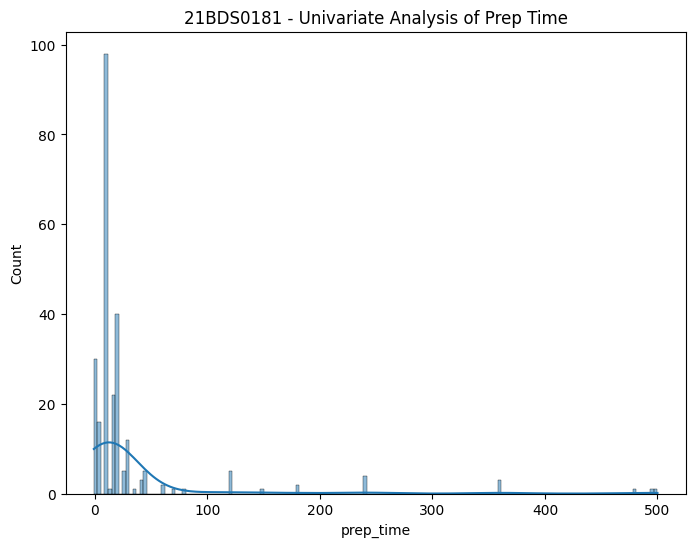

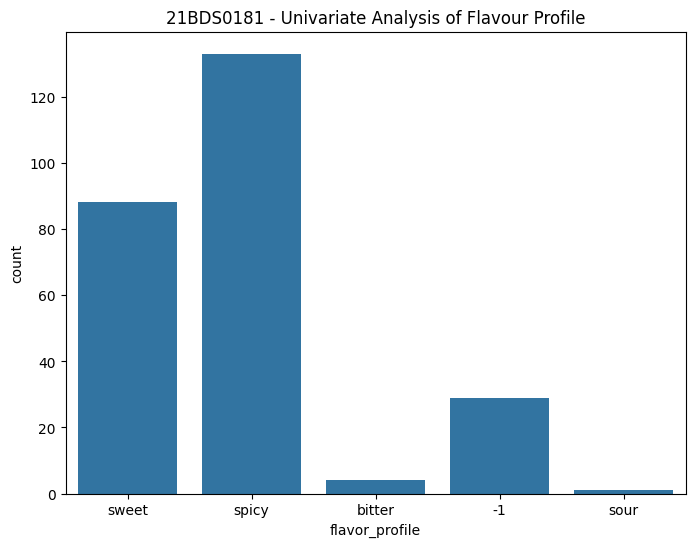

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of univariate analysis for a numerical variable
plt.figure(figsize=(8,6))
sns.histplot(data['prep_time'], kde=True)
plt.title('21BDS0181 - Univariate Analysis of Prep Time')
plt.show()

# Example of univariate analysis for a categorical variable
plt.figure(figsize=(8,6))
sns.countplot(x='flavor_profile', data=data)
plt.title('21BDS0181 - Univariate Analysis of Flavour Profile')
plt.show()


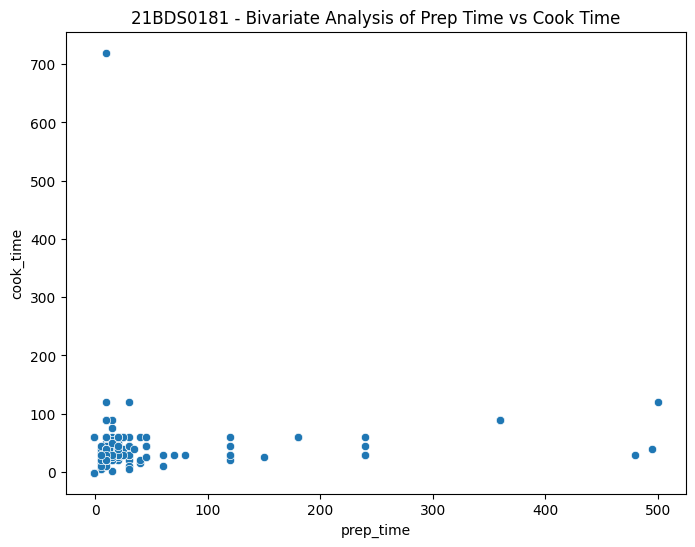

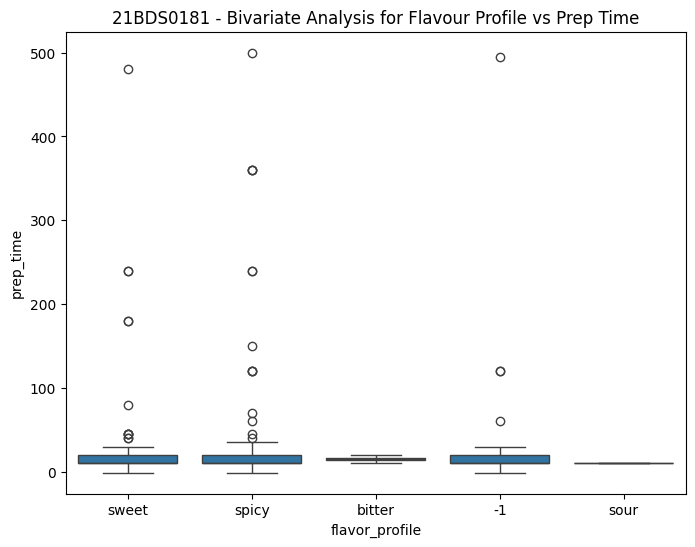

In [ ]:
# Scatter plot for bivariate analysis between two numerical variables
plt.figure(figsize=(8,6))
sns.scatterplot(x='prep_time', y='cook_time', data=data)
plt.title('21BDS0181 - Bivariate Analysis of Prep Time vs Cook Time')
plt.show()

# Boxplot for bivariate analysis between a numerical and a categorical variable
plt.figure(figsize=(8,6))
sns.boxplot(x='flavor_profile', y='prep_time', data=data)
plt.title('21BDS0181 - Bivariate Analysis for Flavour Profile vs Prep Time')
plt.show()


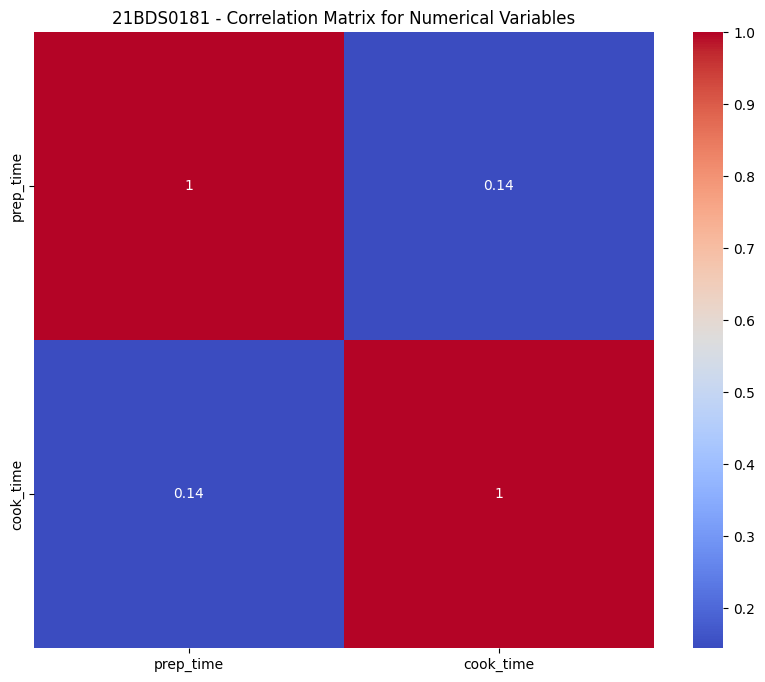

In [ ]:
# Select only the numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Check the numerical columns and their correlations
corr_matrix = numerical_data.corr()

# Plot the heatmap for the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('21BDS0181 - Correlation Matrix for Numerical Variables')
plt.show()


CLUSTERING

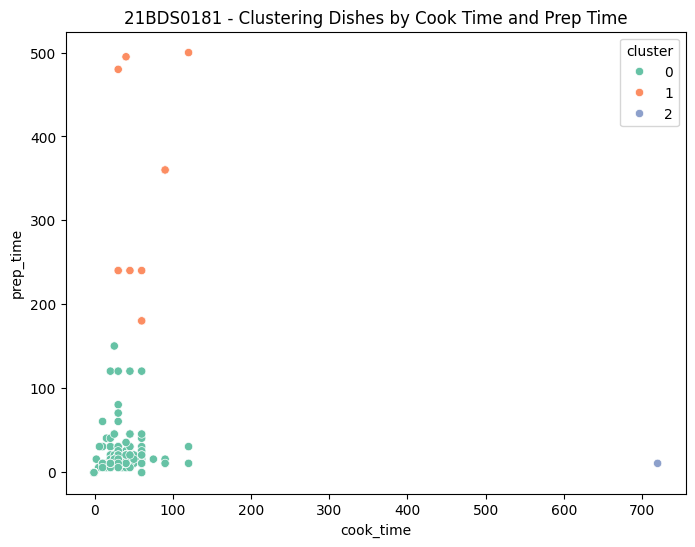

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the environment variable to avoid memory leak
os.environ["OMP_NUM_THREADS"] = "1"

# K-means clustering on numerical columns (e.g., cook_time and prep_time)
X = data[['cook_time', 'prep_time']].dropna()

# Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=3, n_init=10)
data['cluster'] = kmeans.fit_predict(X)

# Visualizing clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='cook_time', y='prep_time', hue='cluster', data=data, palette='Set2')
plt.title('21BDS0181 - Clustering Dishes by Cook Time and Prep Time')
plt.show()


DIMENSIONALITY REDUCTION

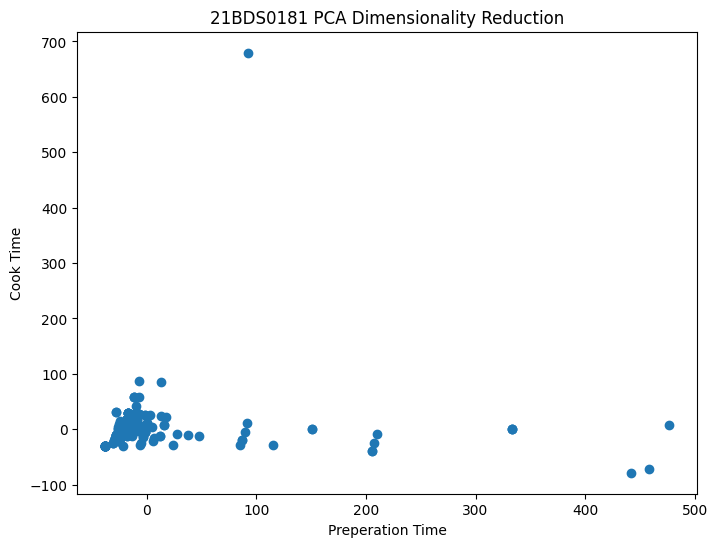

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' is a DataFrame and you're selecting specific columns
# Replace 'another_column' with the actual column you want to use
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data[['prep_time', 'cook_time']])

# Visualizing PCA components
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('21BDS0181 PCA Dimensionality Reduction')
plt.xlabel('Preperation Time')
plt.ylabel('Cook Time')
plt.show()



MODEL DEVELOPMENT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming we want to predict cooking time based on prep time (modify as needed)
X = data[['prep_time']]
y = data['cook_time']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 498.30843850328876
